In [1]:
%matplotlib inline

In [2]:
cd Python_Scripts/

/Users/chowdahead/Python_Scripts


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import patheffects
from datetime import datetime
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
import glob

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import geopandas as gp

import numpy as np

In [ ]:
import map_fig

In [ ]:
fig,ax = map_fig.create_map()
fig.savefig("uhhh.png")

In [ ]:
cd /Users/chowdahead/wx-data

In [14]:
today = datetime.utcnow()
today_date = f"{today:%Y_%m_%d}"
today_date

'2021_03_18'

In [6]:
base_path = "/Users/chowdahead/wx-data"
file_path = f"{base_path}/{today_date}"

### Probablility of Ice > 0.25"
https://ftp.wpc.ncep.noaa.gov/shapefiles/ww/day1/DAY1_PICEZ_GT_25_latest.tar

### Probablility of Snow greater than 4, 8, and 12"
https://ftp.wpc.ncep.noaa.gov/shapefiles/ww/day1/DAY1_PSNOW_GT_04_latest.tar
https://ftp.wpc.ncep.noaa.gov/shapefiles/ww/day1/DAY1_PSNOW_GT_08_latest.tar
https://ftp.wpc.ncep.noaa.gov/shapefiles/ww/day1/DAY1_PSNOW_GT_12_latest.tar

### Also has roughly a month of archived data

In [8]:
snow_tot = 4
snow_tot = f"{snow_tot:02d}"
day_num = 2

In [ ]:
! curl -L https://ftp.wpc.ncep.noaa.gov/shapefiles/ww/day"$day_num"/DAY"$day_num"_PSNOW_GT_"$snow_tot"_latest.tar > "$file_path"/DAY"$day_num"_PSNOW_GT_"$snow_tot"_latest.tar
! mkdir "$file_path"/DAY"$day_num"_PSNOW_GT_"$snow_tot"_latest/
! tar xvzf "$file_path"/DAY"$day_num"_PSNOW_GT_"$snow_tot"_latest.tar -C "$file_path"/DAY"$day_num"_PSNOW_GT_"$snow_tot"_latest/

In [19]:
! curl -L https://ftp.wpc.ncep.noaa.gov/shapefiles/ww/day"$day_num"/DAY"$day_num"_PICEZ_GT_25_latest.tar > "$file_path"/DAY"$day_num"_PICEZ_GT_25_latest.tar
! mkdir "$file_path"/DAY"$day_num"_PICEZ_GT_25_latest
! tar xvzf "$file_path"/DAY"$day_num"_PICEZ_GT_25_latest.tar -C "$file_path"/DAY"$day_num"_PICEZ_GT_25_latest

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10240  100 10240    0     0  12004      0 --:--:-- --:--:-- --:--:-- 11990
mkdir: /Users/chowdahead/wx-data/2021_03_17/DAY1_PICEZ_GT_25_latest: File exists
x wwd_day1_picez_gt_25.dbf
x wwd_day1_picez_gt_25.prj
x wwd_day1_picez_gt_25.shp
x wwd_day1_picez_gt_25.shx


In [10]:
PATH = f"DAY{day_num}_PSNOW_GT_04_latest"
PATH

'DAY1_PSNOW_GT_04_latest'

In [20]:
PATH = f"DAY{day_num}_PICEZ_GT_25_latest"
PATH

'DAY1_PICEZ_GT_25_latest'

In [21]:

path = f"{file_path}/{PATH}"
shp =  glob.glob(f"{path}/*.shp")
shp

['/Users/chowdahead/wx-data/2021_03_17/DAY1_PICEZ_GT_25_latest/wwd_day1_picez_gt_25.shp']

In [22]:

shp = shp[0]
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
usa = gp.read_file(shp)
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
#usa #last 5 records in dataframe
usa.head()

Shape of the dataframe: (1, 8)
Projection of dataframe: GEOGCS["GCS_Sphere_EMEP",DATUM["D_Sphere_EMEP",SPHEROID["Sphere_EMEP",6371200,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,ID,PRODUCT,VALID_TIME,OUTLOOK,ISSUE_TIME,START_TIME,END_TIME,geometry
0,1,Day 1 probability of ice greater than .25 inches,00Z 03/19/21 - 00Z 03/20/21,Less than 10 percent,2021-03-18 20:16:51,2021-03-19 00:00:00,2021-03-20 00:00:00,"POLYGON ((-88.00000 25.00000, -87.90000 25.000..."


In [10]:
usa.crs

<Geographic 2D CRS: GEOGCS["GCS_Sphere_EMEP",DATUM["D_Sphere_EMEP",SPH ...>
Name: GCS_Sphere_EMEP
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Sphere_EMEP
- Ellipsoid: Sphere_EMEP
- Prime Meridian: Greenwich

In [23]:
usa.OUTLOOK.unique()

array(['Less than 10 percent'], dtype=object)

In [24]:
crs = usa.crs
crs

<Geographic 2D CRS: GEOGCS["GCS_Sphere_EMEP",DATUM["D_Sphere_EMEP",SPH ...>
Name: GCS_Sphere_EMEP
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Sphere_EMEP
- Ellipsoid: Sphere_EMEP
- Prime Meridian: Greenwich

In [31]:
slght = usa[usa.OUTLOOK == 'Less than 10 percent']
slght.geometry

0    POLYGON ((-88.00000 25.00000, -87.90000 25.000...
Name: geometry, dtype: geometry

In [25]:
moder = usa[usa.OUTLOOK == 'Moderate (40-69%)']
moder

,ID,PRODUCT,VALID_TIME,OUTLOOK,ISSUE_TIME,START_TIME,END_TIME,geometry


In [26]:
high = usa[usa.OUTLOOK == 'High (70-100%)']
high

,ID,PRODUCT,VALID_TIME,OUTLOOK,ISSUE_TIME,START_TIME,END_TIME,geometry


2021_03_18_day1_ice_prob_GT25.png


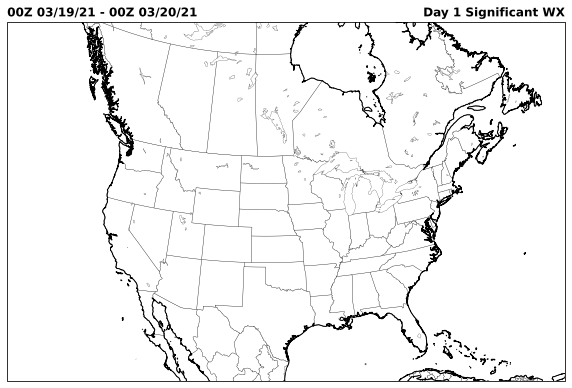

In [30]:

   
    # Set Projection of Plot
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)
    
    # Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-130., -65, 20., 60.]
    
    
fig = plt.figure(figsize=(10., 8.))
    
    #add_metpy_logo(fig, 25, 950, size='small')
    
                                        # Add the Map 
    #---------------------------------------------------------------------------------------------------
ax = plt.subplot(111, projection=plotcrs)
    
    
    # Set extent and plot map lines
ax.set_extent(extent)
         
ax.coastlines(resolution='10m')
    
                                # Add State/Country Boundaries to Plot
    #---------------------------------------------------------------------------------------------------    
   
    #ax.add_feature(cfeature.BORDERS,edgecolor="k")
    #ax.add_feature(cfeature.LAND,facecolor="k",linewidth=0.2)
    #ax.add_feature(cfeature.OCEAN,facecolor="k",linewidth=0.2,edgecolor="k")
    #ax.add_feature(cfeature.LAKES,facecolor="k",linewidth=0.2,edgecolor="k",)
    
state_borders = cfeature.NaturalEarthFeature(
                    category='cultural', name='admin_1_states_provinces_lines',
                    scale='10m',facecolor='none')
ax.add_feature(state_borders, edgecolor='k', linewidth=0.35)
        
country_borders = cfeature.NaturalEarthFeature(category='cultural',
                    name='admin_0_countries',scale='10m', facecolor='none')
ax.add_feature(country_borders,edgecolor='k',linewidth=0.2)
    
    
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        facecolor="w")
ax.add_feature(lakes,edgecolor='k',linewidth=0.2)
      
#ax.add_feature(cfeature.BORDERS,edgecolor="w")
ax.add_feature(cfeature.LAND,facecolor="w",linewidth=0.2)
ax.add_feature(cfeature.OCEAN,facecolor="w",linewidth=0.2,edgecolor="k")

#ax.add_feature(COUNTIES)
#ax.add_geometries(elev["geometry"],crs=ccrs.PlateCarree(),
#                  facecolor="orange",edgecolor="k",alpha=0.5)
#ax.add_geometries(crit["geometry"],crs=ccrs.PlateCarree(),
#                  facecolor="red",edgecolor="k",alpha=0.5)
#ax.add_geometries(extr["geometry"],crs=ccrs.PlateCarree(),
#                  facecolor="k",edgecolor="k",alpha=0.5)

ax.add_geometries(slght["geometry"],crs=ccrs.PlateCarree(),
                  facecolor="k",edgecolor="k",alpha=0.5)

#ax.text(-129.5,20.3, "Slight (10-39%)", size=18,
#        color="b", bbox=dict(fc="none"),transform=ccrs.PlateCarree())

outline_effect = [patheffects.withStroke(linewidth=1.5, foreground='k')] 
texts = ['Elevated','Critical','Extreme']
colors = ['orange','red','#FF69B4']
Texts = []
   # Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
'''
for t,c in zip(texts,colors):
    Texts.append(TextArea(t,textprops=dict(color=c,fontsize=15,path_effects=outline_effect)))
    
texts_vbox = VPacker(children=Texts,pad=1,sep=5)
ann = AnnotationBbox(texts_vbox,(.012,0.1),xycoords=ax.transAxes,
                            box_alignment=(0,.5),bboxprops = 
                            dict(facecolor='w',boxstyle='round',edgecolor='k'))
ann.set_figure(fig)
fig.artists.append(ann)
'''
#prod = usa['PRODUCT'][0].replace("probability","prob.").replace("greater than",">").replace("inches","in.")

outline_effect2 = [patheffects.withStroke(linewidth=1.5, foreground='w')] 
ax.set_title(f"Day {day_num} Significant WX",loc='right',color='k', fontsize=12, weight='bold',
            path_effects=outline_effect2)

ax.set_title(usa["VALID_TIME"][0],loc='left',color='k', fontsize=12, weight='bold',
            path_effects=outline_effect2)

#ax.set_title(usa["VALID_DATE"][0],loc='left',color='k', fontsize=12, weight='bold',
#            path_effects=outline_effect2)

#prod_time = ax.text(0.99, 0.01,prod ,
#                            horizontalalignment='right', transform=ax.transAxes,
#                            color='white', fontsize=7, weight='bold')

#prod_time.set_path_effects(outline_effect)
    

file_time = usa.ISSUE_TIME[0][:10].replace("-","_")
file_time = f"{file_time}_day{day_num}_ice_prob_GT25.png"
print(file_time)
fig.savefig(file_time,bbox_inches="tight",dpi=120)

#print(f"{file_time}_day{day_num}_snow_prob_GT{snow_tot}.png")
#fig.savefig(f"{file_time}_day{day_num}_snow_prob_GT{snow_tot}.png",bbox_inches="tight",dpi=120)

In [ ]:
elev.plot()